In [1]:
"""                         Sorting Arrays                           """

'                         Sorting Arrays                           '

In [2]:
import numpy as np

In [3]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [4]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

In [5]:
# ------> Fast Sorting in NumPy: np.sort and np.argsort <----- #

In [6]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [8]:
x.sort()
print(x)

[1 2 3 4 5]


In [ ]:
x = np.array([2, 1, 3, 5 ,4])
np.argsort(x)


array([1, 0, 2, 4, 3])

In [ ]:
x[np.argsort(x)]   # arg qaysi indeks degani 

array([1, 2, 3, 4, 5])

In [12]:
# -----> Sorting along rows or columns

In [14]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [18]:
np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]], dtype=int32)

In [19]:
np.sort(X, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]], dtype=int32)

In [34]:
# -----> Partial Sorts: Partitioning

In [35]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([1, 2, 3, 4, 5, 6, 7])

In [36]:
np.partition(X, 2, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]], dtype=int32)

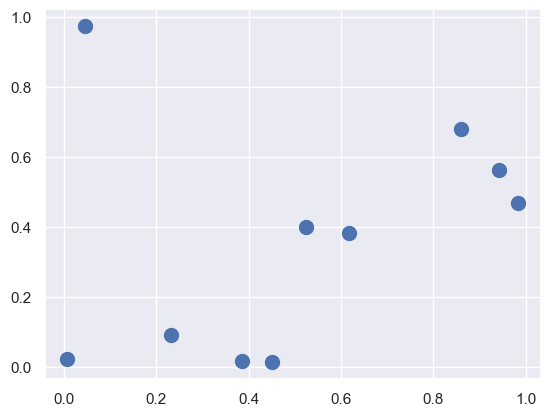

In [37]:
X = rand.rand(10, 2)
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1], s = 100)


In [38]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)


In [ ]:
# Har bir nuqta juftligi uchun koordinatalar farqlarini hisoblash
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape
# Natija: (10, 10, 2)


(10, 10, 2)

In [41]:
# Koordinatalar farqlarini kvadratga ko‘tarish
sq_differences = differences ** 2
sq_differences.shape
# Natija: (10, 10, 2)


(10, 10, 2)

In [42]:

# Kvadrat farqlarni yig‘ib, kvadrat masofani olish
dist_sq = sq_differences.sum(-1)
dist_sq.shape
# Natija: (10, 10

(10, 10)

In [43]:
dist_sq.diagonal()
# Natija: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)



[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [45]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)


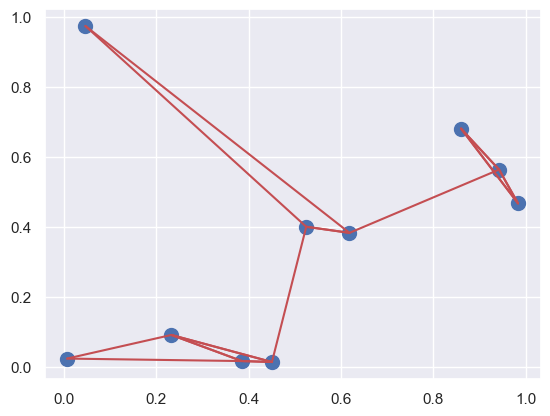

In [50]:
plt.scatter(X[:, 0], X[:, 1], s = 100)
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K + 1]:
        plt.plot(*zip(X[j], X[i]), color = "r")